# Import Packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

# Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS Course/Final Project Dibimbing/Crop_recommendation.csv')

# Initial EDA

In [ ]:
# Display the first 5 rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Dataset Description :

- N = ratio of Nitrogen content in soil
- P = ratio of Phosphorous content in soil
- K = ratio of Potassium content in soil
- temperature = temperature in degree Celsius
- humidity = relative humidity in %
- ph = ph value of the soil
- rainfall = rainfall in mm
- label = crop type

In [ ]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


- There are 2200 rows of data with 8 columns
- The target variable is `Label`
- Data has float, integer and string values.
- No column has null/missing values.

In [ ]:
# Method to get summary statistics for numerical columns
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


- There is crop don't need Nitrogen (we explore more in features analysis)
- there is crop need higher Nitrogen, Phosphorous, and Potassium

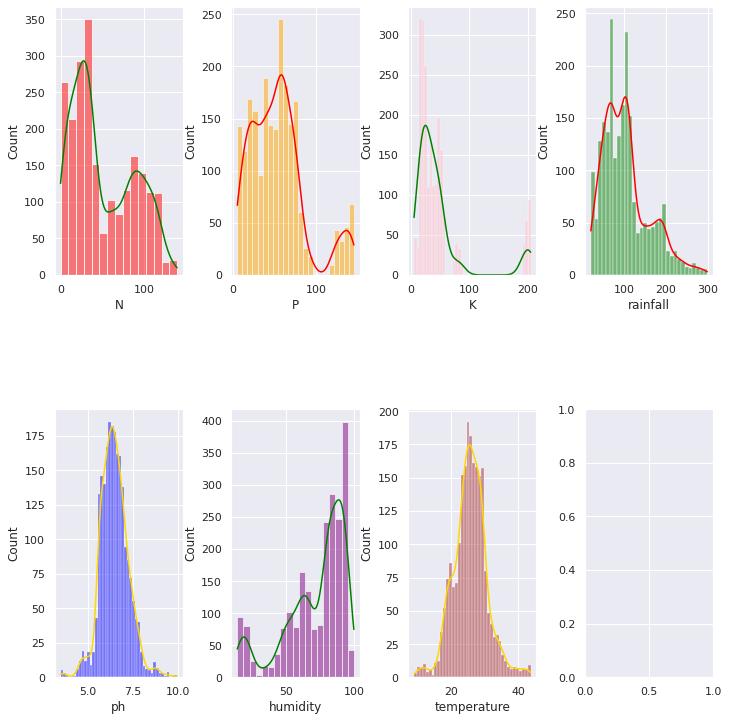

In [ ]:
# Checking numerical data distribution
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
fig.tight_layout()

nitrogen_dist = sns.histplot(df, x="N", kde=True, color='red',ax=axes[0, 0])
phosporous_dist = sns.histplot(df, x="P", kde=True, color='orange',ax=axes[0, 1])
potassium_dist = sns.histplot(df, x="K", kde=True, color='pink',ax=axes[0, 2])
rainfall_dist = sns.histplot(df, x="rainfall", kde=True, color='green',ax=axes[0, 3])
ph_dist = sns.histplot(df, x="ph", kde=True, color='blue',ax=axes[1, 0])
humidity_dist = sns.histplot(df, x="humidity", kde=True, color='purple',ax=axes[1, 1])
temp_dist = sns.histplot(df, x="temperature", kde=True, color='brown',ax=axes[1, 2])

plt.subplots_adjust(hspace = 0.5)
nitrogen_dist.lines[0].set_color('green')
phosporous_dist.lines[0].set_color('red')
potassium_dist.lines[0].set_color('green')
rainfall_dist.lines[0].set_color('red')
ph_dist.lines[0].set_color('gold')
humidity_dist.lines[0].set_color('green')
temp_dist.lines[0].set_color('gold')

# Target Feature Analysis

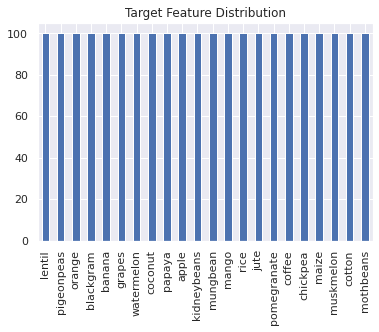

In [ ]:
#Checking Distribution of Target Feature before Grouping
df['label'].value_counts().plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

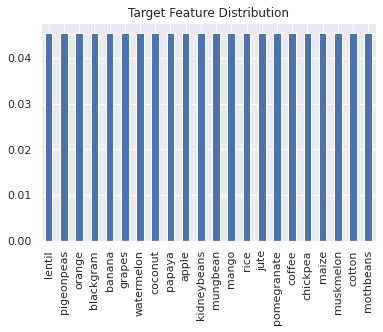

In [ ]:
#Checking Persentation Distribution of Target Feature before grouping
df['label'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

In [ ]:
#Grouping Category Crops
lentils = ['lentil', 'mothbeans', 'chickpea', 'mungbean', 'pigeonpeas', 'kidneybeans', 'blackgram']
fruits = ['grapes', 'orange', 'apple', 'banana', 'mango', 'papaya', 'watermelon', 'muskmelon', 'pomegranate']

In [ ]:
#Define crops to some groups
def clean_crop(x):
    if x in lentils:
        return 'lentils'
    elif x in fruits:
        return 'fruits'
    else:
        return 'plantation crops'


df['label'] = df['label'].apply(clean_crop)

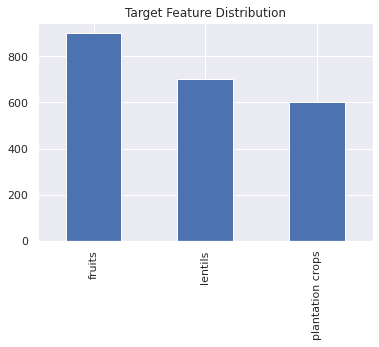

In [ ]:
#Checking Distribution of Target Feature after grouping
df['label'].value_counts().plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

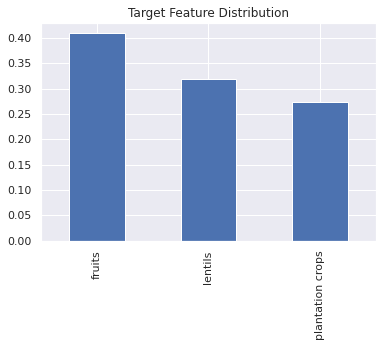

In [ ]:
#Checking Persentation Distribution of Target Feature after gruping
df['label'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

- Target feature distribution multiclass is imbalance so, in modelling we using f1 score for scoring.
- We don't using oversampling because minor class >20%.

# Correlation Analysis

In [ ]:
# Method to calculate the correlation matrix for all of the numerical columns
# default is pearson correlation
df_corr = df.corr()
df_corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


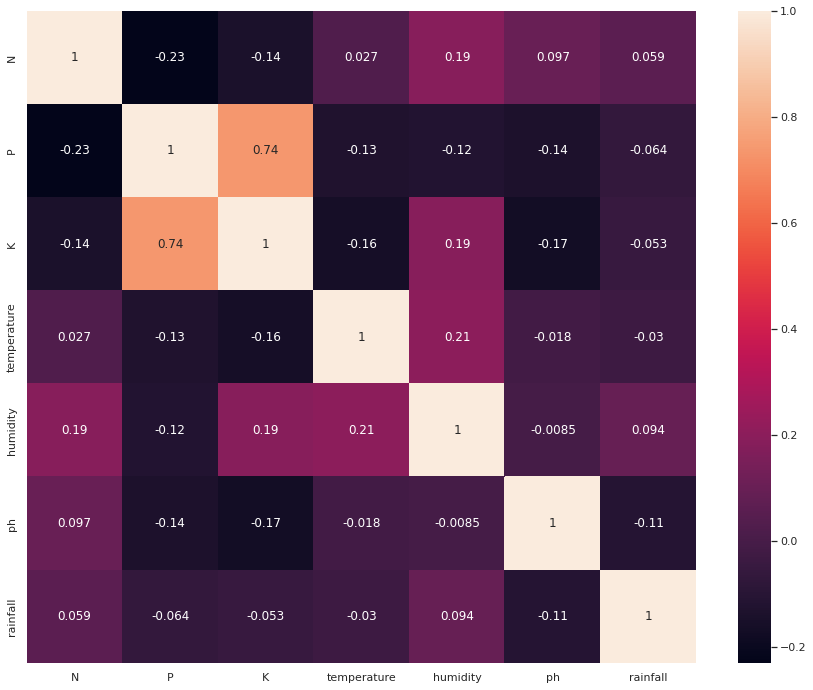

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True)

- `N` and `K` have correlation highly (0.74) 
- `N` and `P` have negative correlation
-  There is no correlation >= 0.8 (multicollinearity) so, we can use all features.

# Features Analysis

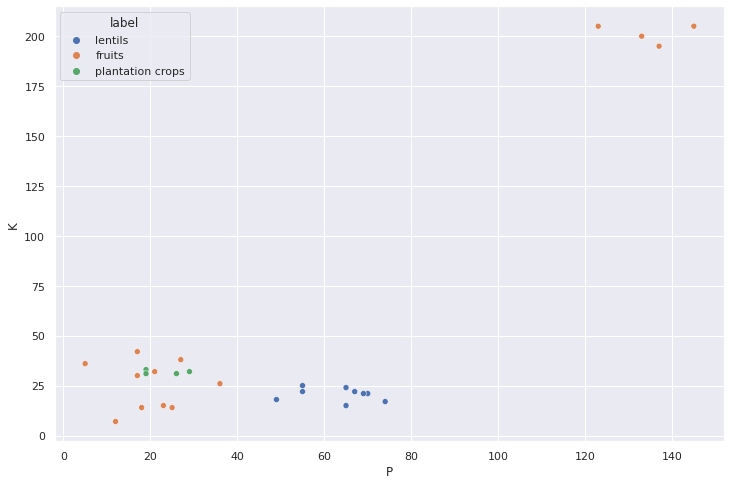

In [ ]:
#checking crop type have condition nitrogen = 0
plt.figure(figsize = (12,8))
sns.scatterplot(data=df[df['N'] == 0], x="P", y="K", hue="label")

- Fruits, lentils and plantation crops can growth in soil that have not ratio nitrogen nutrient.
- some type of fruits need higher P and K to growth, this is relevant because P and K used for increase amount of flowers, bigger fruits and increase the sweetness

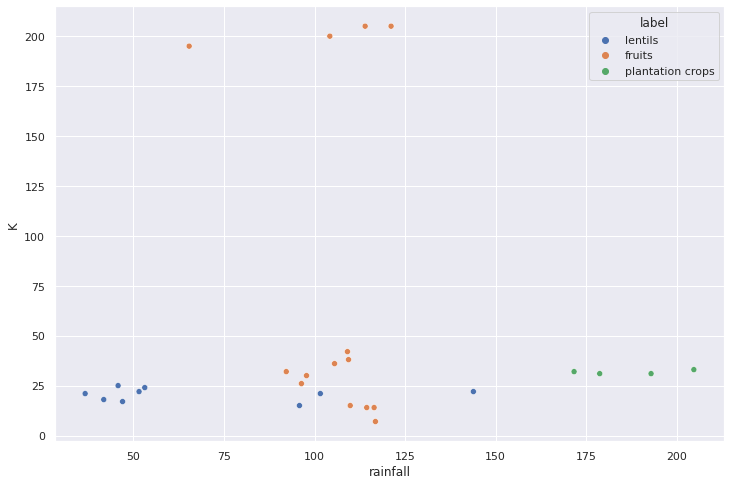

In [ ]:
#checking crop type haven't ratio of nitrogen in soil
plt.figure(figsize = (12,8))
sns.scatterplot(data=df[df['N'] == 0], x="rainfall", y="K", hue="label")

- as we know rainfall containing nitrogen, so nitrogen nutrient in soil obtained from rainfall to growth.
-As long as there is rainfall in the area, plants that grow in soils that have a nitrogen ratio equal to 0 can grow

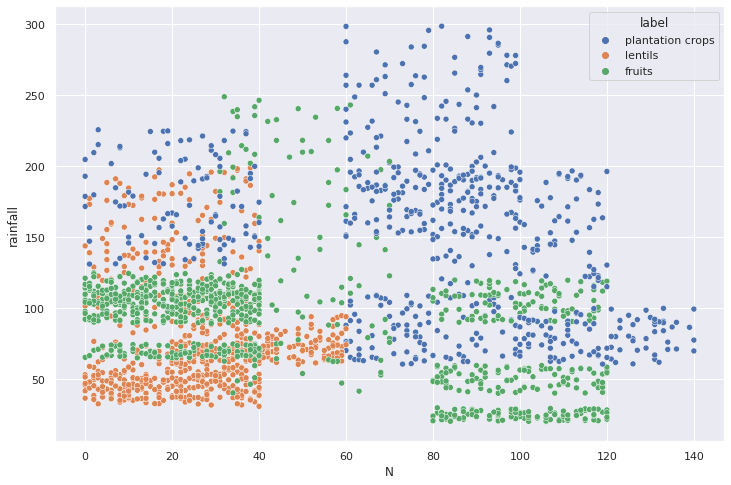

In [ ]:
#checking crop type have not ratio nitrogen in soil next analysis
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="N", y="rainfall", hue="label")

- We can see, plants that can grow with a nitrogen ratio equal to 0 have a shorter ratio interval so that with the help of nitrogen content from rainwater is sufficient for plants to grow.
- necessary of nitrogen in lentils crop more less than crops else.
- Interval of ratio nitrogen in lentils crop more shorter than plantation crops and fruits.

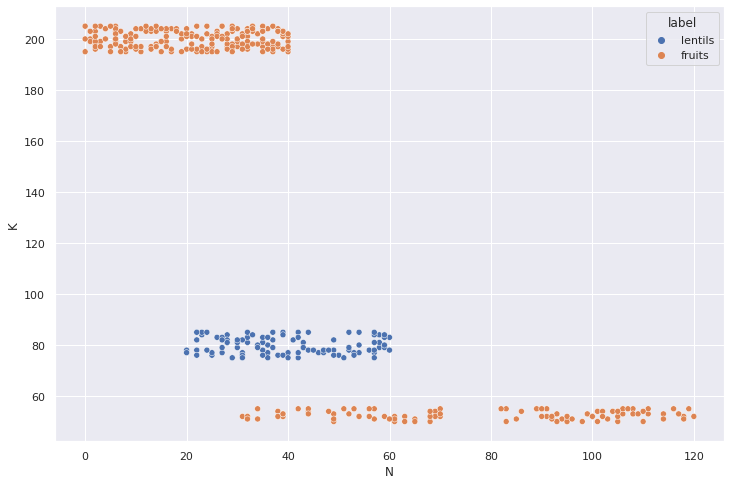

In [ ]:
# Check are all fruits don't have ratio nitrogen in soil where from above data fruits have P > 50 and K > 50
plt.figure(figsize = (12,8))
sns.scatterplot(data=df[(df['P'] >= 50) & (df['K'] >= 50)], x="N", y="K", hue="label")

- We can see not all fruits can growth with soil don't containing nitrogen nutrient
- Need of nitrogent nutrient each type fruit are different, as we can see there is fruit can growth with interval ratio of nitrogen 0-40 and the other hands need higher than before. 
- The composition of the soil content greatly affects the nutritional content of food, as example on of type fruits is eaten by all people containing high potassium so for growth of that fruit need high potassium.
- something interesting is there is lentils need higher P and K. 

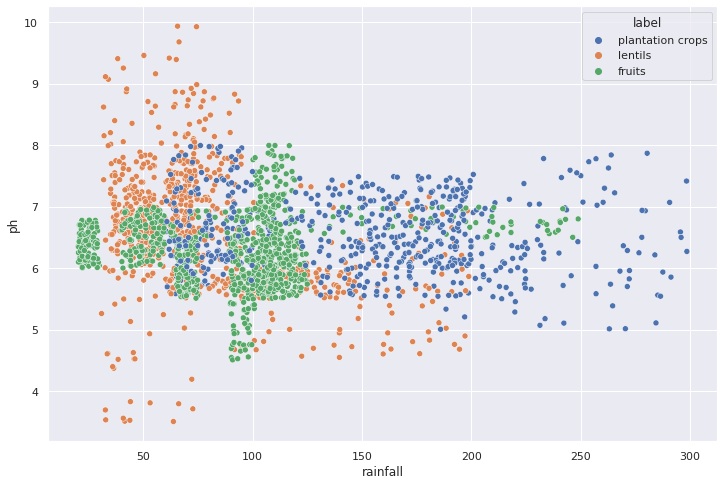

In [ ]:
# ph vs rainfall analysys each crop type
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="rainfall", y="ph", hue="label")

- more higher rainfall, value of pH more lower this make sense because rainwater containg strong acidity.
- we can see there are crops don't growth optimal when rainfall is high.
- There is type of plantation crops can grow in high rainfall
- Something interest that there is type of fruits can grow in high rainfall, as we know in high rainfall fruits tends to rot easily and does not grow optimally.
- lentils crop have long interval range of ph level.

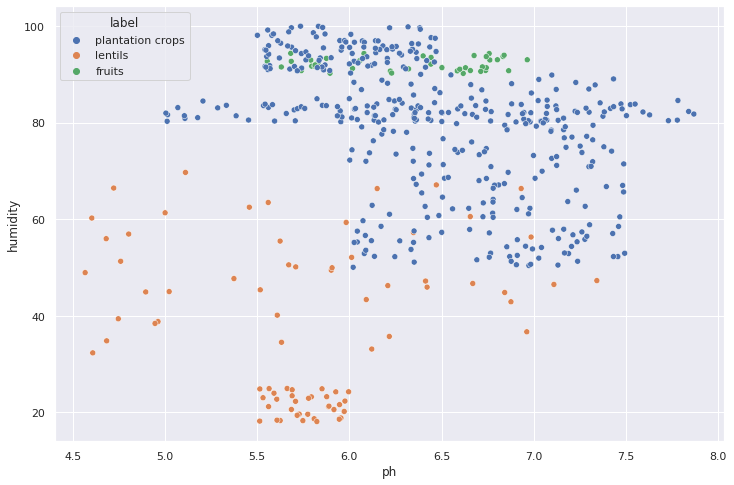

In [ ]:
# Checking crop can growth when rainy season (average rainfall > 120 mm and temperature < 30)
plt.figure(figsize = (12,8))
sns.scatterplot(data=df[(df['rainfall'] > 120) & (df['temperature'] < 30)], x="ph", y="humidity", hue="label")

- in rainy season, lentils crop have humidity level lower than crops else while interval ph longer than else.
- as we know humidty correlation positive with rainfall so more higher humidity, more higher rainfall. in high humidity or high rainfall we can see there are type of plantation crop and fruits can grow that same as analysis before it. so we trace what kind of crops in the data, it turns out that have these conditions are papaya and rice.

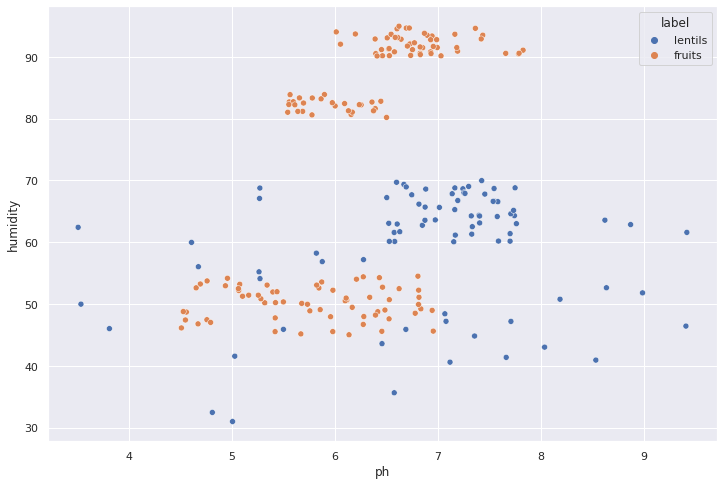

In [ ]:
# Checking crop can growth when summer season (temperature > 30 & rainfall <120 mm)
plt.figure(figsize = (12,8))
sns.scatterplot(data=df[(df['rainfall'] < 120) & (df['temperature'] > 30)], x="ph", y="humidity", hue="label")

- In summer season, only 2 group crops have optimal growth that are lentils and fruit.
- there is fruit have level humidity lower than fruit else. so we trace what kind of fruit can't stand with high humidty and range ph 4-7 and we got mango in dataset that relevant based on literature mangoo in high humidty can influence productivity of mango.

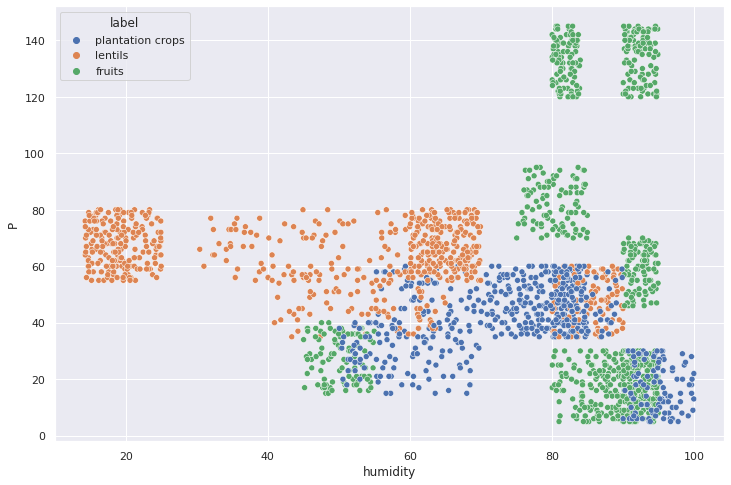

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="humidity", y="P", hue="label")

- Avarage fruits need condition for growth that are in higher humidity and ratio of phosporous > 50
- there are type of fruits and plantation crops have ratio of phosporous less than 20 
- average lentils crop need ratio of phosporous more than 50

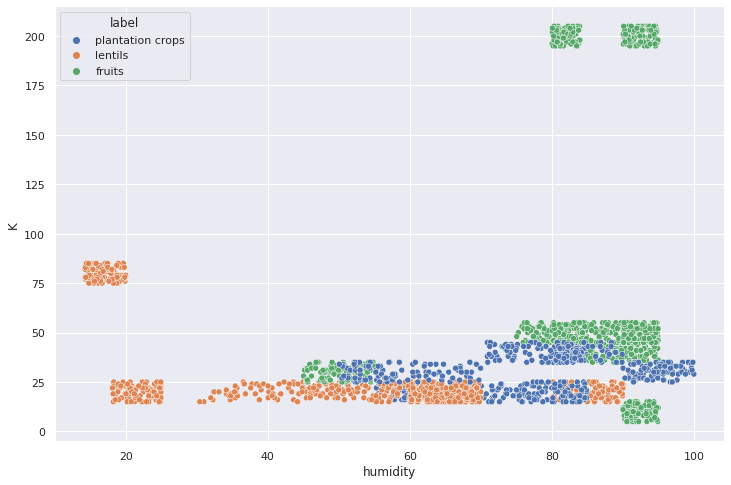

In [ ]:
#Analysis trend Potassium Vs humidty
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="humidity", y="K", hue="label")

- Avarage fruits need condition for growth that are in higher humidity and ratio of potassium > 60
- there are type of fruits and plantation crops have ratio of potassium less than 20 
- there are 2 type of fruits have biggest ratio of potassium after we trace from dataset that fruits are apple and grapes

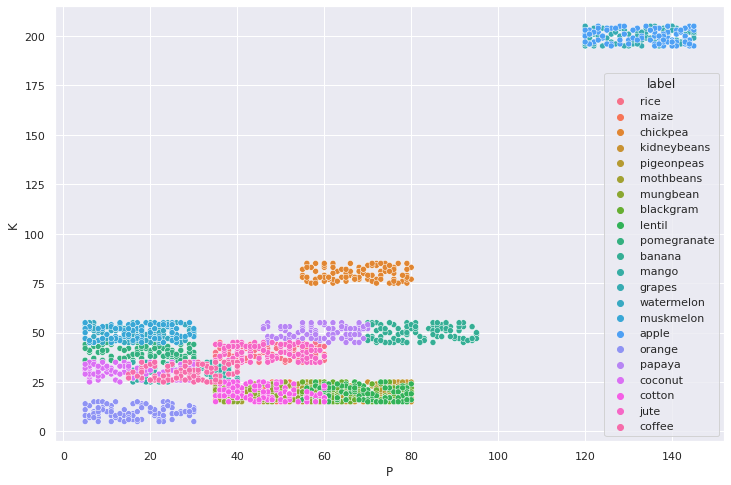

In [ ]:
#Analysis trend Potassium vs Phsoporous
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="P", y="K", hue="label")

- Need of ratio phosporous are balance with need ratio of potassium in each crop type

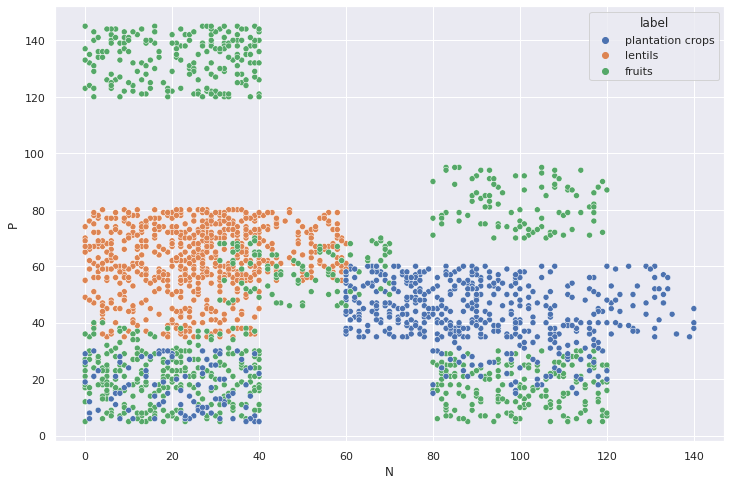

In [ ]:
#Analysis trend Nitrogen vs phosporous
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="N", y="P", hue="label")

- There are fruits need high ratio potassium while need ratio of nitrogen are low. 

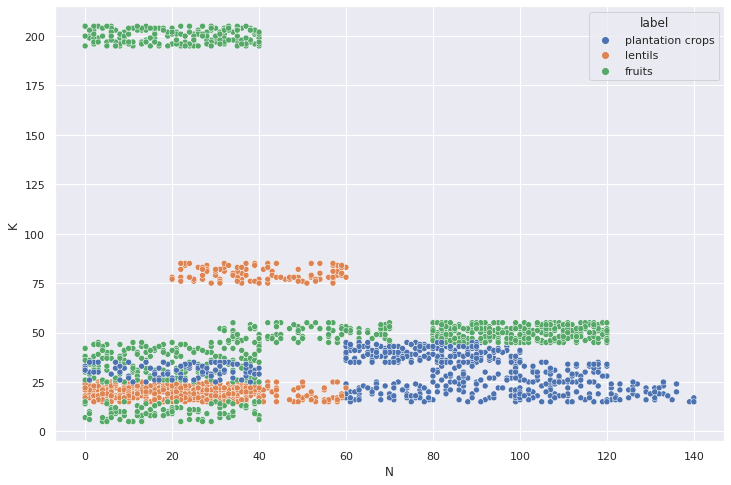

In [ ]:
#Analysis trend N vs K
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="N", y="K", hue="label")

- All type plantation crops need ratio of potassium less than 50
- same as analysis in phosporous, fruits need high ratio of potassium and phosporous have low ratio of nitrogen. 

# Data Preprocessing

In [ ]:
# Label Encoding for Target Feature (label feature)
label = df.label.astype('category')
targets = dict(enumerate(label.cat.categories))
df['target']=label.cat.codes

In [ ]:
final_feature_column = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target_column = ['target']
final_column = final_feature_column+target_column

In [ ]:
# standardize the data
scaler = preprocessing.StandardScaler()
df_ready = df[final_column].copy()
df_ready = pd.DataFrame(scaler.fit_transform(df_ready[final_feature_column]),columns=final_feature_column)
df_ready['target'] = df['target'].to_numpy()

In [ ]:
# prepare the data to numpy array
X = df_ready[final_feature_column].to_numpy()
y = df_ready[target_column].to_numpy()

In [ ]:
print('shape of final feature:',X.shape)
print('shape of target:',y.shape)

shape of final feature: (2200, 7)
shape of target: (2200, 1)


In [ ]:
# split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# KNN Classification

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='f1_weighted')
knn_clf_gridcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='f1_weighted')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'n_neighbors': 2, 'weights': 'uniform'}",0.997158,9
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.997726,6
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.997727,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.997727,1
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.997727,1
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.997727,1
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.997159,7
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.997727,1
8,"{'n_neighbors': 6, 'weights': 'uniform'}",0.997158,10
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.997159,7


In [ ]:
# let's order based on rank!
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.997727,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.997727,1
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.997727,1
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.997727,1
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.997727,1
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.997726,6
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.997159,7
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.997159,7
0,"{'n_neighbors': 2, 'weights': 'uniform'}",0.997158,9
8,"{'n_neighbors': 6, 'weights': 'uniform'}",0.997158,10


The best model: n_neighbours = 3, weights = 'uniform'.

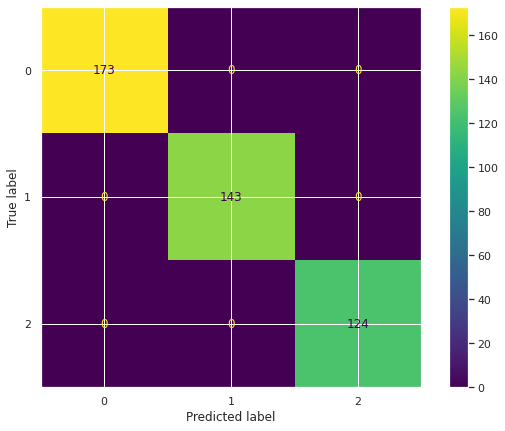

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       143
           2       1.00      1.00      1.00       124

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



F1 Score KNN model on evaluation test data is 100%

# Random Forest

In [ ]:
# load the algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='f1_weighted')
rf_clf_gridcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

CPU times: user 9.38 s, sys: 25.2 ms, total: 9.41 s
Wall time: 9.45 s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.999432,1
22,"{'max_depth': 5, 'n_estimators': 30}",0.999432,1
16,"{'max_depth': 4, 'n_estimators': 20}",0.999432,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.999432,1
18,"{'max_depth': 4, 'n_estimators': 40}",0.998864,5
21,"{'max_depth': 5, 'n_estimators': 20}",0.998863,6
19,"{'max_depth': 4, 'n_estimators': 50}",0.998863,6
17,"{'max_depth': 4, 'n_estimators': 30}",0.998295,8
12,"{'max_depth': 3, 'n_estimators': 30}",0.997154,9
20,"{'max_depth': 5, 'n_estimators': 10}",0.997152,10


The best model: max_depth = 5, n_estimator = 50.

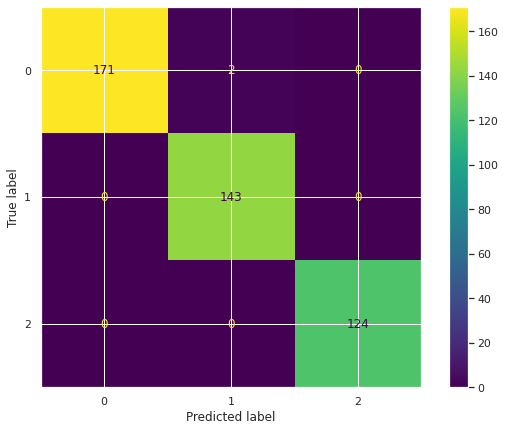

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       173
           1       0.99      1.00      0.99       143
           2       0.99      1.00      1.00       124

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440



F1 score Model Random Forest on evaluation dataset is 99.61%

# Logistic Regressions

In [ ]:
# define the estimator/model
from sklearn.linear_model import LogisticRegression

lrg_clf = LogisticRegression()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': (0.01,0.1,10,20,30),
    'solver': ('newton-cg', 'sag', 'saga', 'lbfgs')
}

lrg_clf_gridcv = GridSearchCV(lrg_clf, parameters, cv=5, scoring='f1_weighted')
lrg_clf_gridcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': (0.01, 0.1, 10, 20, 30),
                         'solver': ('newton-cg', 'sag', 'saga', 'lbfgs')},
             scoring='f1_weighted')

In [ ]:
# the compact results
cv_result = pd.DataFrame(lrg_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.01, 'solver': 'newton-cg'}",0.857042,17
1,"{'C': 0.01, 'solver': 'sag'}",0.857042,17
2,"{'C': 0.01, 'solver': 'saga'}",0.857042,17
3,"{'C': 0.01, 'solver': 'lbfgs'}",0.857042,17
4,"{'C': 0.1, 'solver': 'newton-cg'}",0.911797,13
5,"{'C': 0.1, 'solver': 'sag'}",0.911797,13
6,"{'C': 0.1, 'solver': 'saga'}",0.911797,13
7,"{'C': 0.1, 'solver': 'lbfgs'}",0.911797,13
8,"{'C': 10, 'solver': 'newton-cg'}",0.923163,9
9,"{'C': 10, 'solver': 'sag'}",0.923163,9


In [ ]:
# let's order based on rank!
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
19,"{'C': 30, 'solver': 'lbfgs'}",0.923719,1
17,"{'C': 30, 'solver': 'sag'}",0.923719,1
16,"{'C': 30, 'solver': 'newton-cg'}",0.923719,1
15,"{'C': 20, 'solver': 'lbfgs'}",0.923719,1
14,"{'C': 20, 'solver': 'saga'}",0.923719,1
13,"{'C': 20, 'solver': 'sag'}",0.923719,1
12,"{'C': 20, 'solver': 'newton-cg'}",0.923719,1
18,"{'C': 30, 'solver': 'saga'}",0.923719,1
11,"{'C': 10, 'solver': 'lbfgs'}",0.923163,9
10,"{'C': 10, 'solver': 'saga'}",0.923163,9


The best model: C = 30, solver = 'lbfgs'.

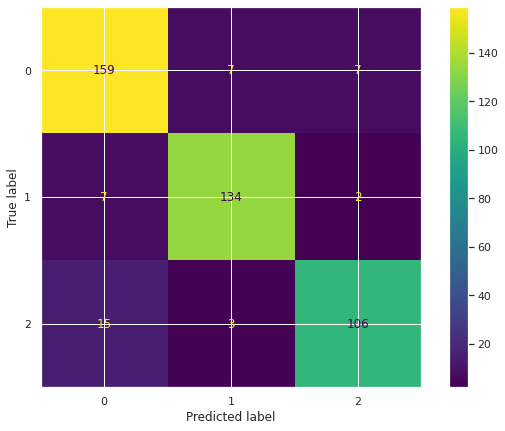

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = lrg_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=lrg_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lrg_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = lrg_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       173
           1       0.93      0.94      0.93       143
           2       0.92      0.85      0.89       124

    accuracy                           0.91       440
   macro avg       0.91      0.90      0.91       440
weighted avg       0.91      0.91      0.91       440



F1 score in model logistic regression on evaluation test data is 91.46 %

**Based on 3 models supervised learning the best result on KNN Classification**